In [71]:
import pandas as pd
import numpy as np
import seaborn as sbn
import scipy as spy
import matplotlib.pyplot as plt

In [72]:
url = "https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv"
dados = pd.read_csv(url)

In [73]:
dados.head(10)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000
5,Rua Graham Bell,Santo Amaro,São Paulo,440,4,4,6,R$ 1.980.000
6,"Rua Francisco Paulo, 31",Cidade Mãe do Céu,São Paulo,145,4,4,2,R$ 850.000
7,"Rua Guilherme Valente, 150",Jardim Vergueiro,São Paulo,150,2,2,2,R$ 450.000
8,"Rua Sagrada Família, 8",Jardim Benfica,São Paulo,48,2,1,1,R$ 199.900
9,Rua Tapaji,Vila Alpina,São Paulo,114,3,3,2,R$ 585.000


In [74]:
#eu preciso alterar a coluna Valor - esta em objeto e eu preciso que ela esteja em int64 - que é numero

In [75]:
dados['Valor'].str.split(expand = True)

,0,1,2
0,R$,7.000.000,None
1,R$,3.700.000,None
2,R$,380.000,None
3,R$,685.000,None
4,R$,540.000,None
...,...,...,...
10003,R$,665.000,None
10004,R$,2.300.000,None
10005,R$,1.050.000,None
10006,R$,2.200,/Mês


In [76]:
#agora eu só escolhi a coluna com números


In [77]:
#agora eu só escolhi a coluna com números
dados['Valor'].str.split(expand = True)[1]

0        7.000.000
1        3.700.000
2          380.000
3          685.000
4          540.000
           ...    
10003      665.000
10004    2.300.000
10005    1.050.000
10006        2.200
10007      270.000
Name: 1, Length: 10008, dtype: object

In [78]:
dados[['Moeda', 'Valor_anuncio', 'Tipo_anuncio']] = dados['Valor'].str.split(expand = True)
dados.sample(10)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio
8018,NaN,Alto de Pinheiros,São Paulo,357,3,4,5,R$ 3.600.000,R$,3.600.000,None
8598,NaN,Vila Firmiano Pinto,São Paulo,120,3,1,4,R$ 795.000,R$,795.000,None
74,Rua Caetano Braga,Conjunto Residencial José Bonifácio,São Paulo,129,3,2,2,R$ 490.000,R$,490.000,None
2234,Rua Bennet,Alto de Pinheiros,São Paulo,536,4,3,6,R$ 3.500.000,R$,3.500.000,None
6279,NaN,Brasilândia,São Paulo,85,2,1,5,R$ 300.000,R$,300.000,None
2423,NaN,Jardim Trussardi,São Paulo,245,3,4,4,R$ 3.000.000,R$,3.000.000,None
478,Rua Constantino de Sousa,Campo Belo,São Paulo,480,6,7,5,R$ 7.200.000,R$,7.200.000,None
2995,Rua Trinta e Um de Março,Fazenda Morumbi,São Paulo,1405,4,10,7,R$ 35.000\n /Mês,R$,35.000,/Mês
6477,Rua Batinga,Vila Nova Mazzei,São Paulo,130,3,2,2,R$ 480.000,R$,480.000,None
3926,Rua José Gonçalves Pereira,Vila Nova Conceição,São Paulo,155,3,3,1,R$ 1.900.000,R$,1.900.000,None


In [79]:
dados[dados["Tipo_anuncio"].isnull()]["Tipo_anuncio"].unique()

array([None], dtype=object)

In [80]:
dados_vendas = dados[dados["Tipo_anuncio"].isnull()]


In [81]:
dados_vendas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9156 entries, 0 to 10007
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Rua            6107 non-null   object
 1   Bairro         9146 non-null   object
 2   Cidade         9156 non-null   object
 3   Metragem       9156 non-null   int64 
 4   Quartos        9156 non-null   int64 
 5   Banheiros      9156 non-null   int64 
 6   Vagas          9156 non-null   int64 
 7   Valor          9156 non-null   object
 8   Moeda          9156 non-null   object
 9   Valor_anuncio  9156 non-null   object
 10  Tipo_anuncio   0 non-null      object
dtypes: int64(4), object(7)
memory usage: 858.4+ KB


In [82]:
#agora eu estou retirando o . ponto
dados_vendas['Valor_anuncio'].str.replace('.','')

C:\Users\GRAZIE~1\AppData\Local\Temp/ipykernel_3660/1800064660.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dados_vendas['Valor_anuncio'].str.replace('.','')


0        7000000
1        3700000
2         380000
3         685000
4         540000
          ...   
10002    1500000
10003     665000
10004    2300000
10005    1050000
10007     270000
Name: Valor_anuncio, Length: 9156, dtype: object

In [83]:
#agora eu vou converter de str para float
#agora criamos o float e podemos usar a coluna com valor
dados_vendas['Valor_anuncio'].str.replace('.','').astype(float)

C:\Users\GRAZIE~1\AppData\Local\Temp/ipykernel_3660/2754259348.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dados_vendas['Valor_anuncio'].str.replace('.','').astype(float)


0       7000000.000000
1       3700000.000000
2        380000.000000
3        685000.000000
4        540000.000000
             ...      
10002   1500000.000000
10003    665000.000000
10004   2300000.000000
10005   1050000.000000
10007    270000.000000
Name: Valor_anuncio, Length: 9156, dtype: float64

In [84]:
dados_vendas["Valor_anuncio_float"] = dados_vendas["Valor_anuncio"].str.replace(".","").astype(float)

C:\Users\GRAZIE~1\AppData\Local\Temp/ipykernel_3660/3338901845.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dados_vendas["Valor_anuncio_float"] = dados_vendas["Valor_anuncio"].str.replace(".","").astype(float)
C:\Users\GRAZIE~1\AppData\Local\Temp/ipykernel_3660/3338901845.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_vendas["Valor_anuncio_float"] = dados_vendas["Valor_anuncio"].str.replace(".","").astype(float)


<AxesSubplot:ylabel='Frequency'>

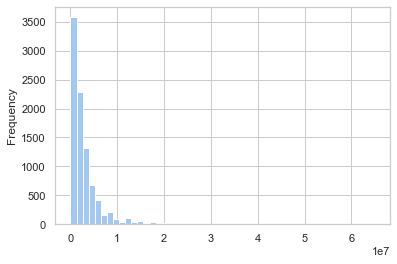

In [85]:
dados_vendas['Valor_anuncio_float'].plot.hist(bins = 50)

In [86]:
pd.set_option('display.precision', 2)   #reduzindo as casas decimais


In [87]:
pd.set_option('display.precision', 2)   #reduzindo as casas decimais
pd.set_option('display.float_format', lambda x: '%2f' % x)
dados_vendas.describe(include = 'all')  #se eu colocar include = all eu vou ter também os valores das variantes categóricas também

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio,Valor_anuncio_float
count,6107,9146,9156,9156.000000,9156.000000,9156.000000,9156.000000,9156,9156,9156,0,9156.000000
unique,3006,697,1,NaN,NaN,NaN,NaN,939,1,939,0,NaN
top,Rua Alberto Faria,Alto de Pinheiros,São Paulo,NaN,NaN,NaN,NaN,R$ 2.500.000,R$,2.500.000,NaN,NaN
freq,24,369,9156,NaN,NaN,NaN,NaN,182,9156,182,NaN,NaN
mean,NaN,NaN,NaN,434.416230,3.446811,3.797073,3.960135,NaN,NaN,NaN,NaN,3052202.955439
std,NaN,NaN,NaN,7856.422978,1.048944,1.967873,2.601022,NaN,NaN,NaN,NaN,3944208.186317
min,NaN,NaN,NaN,10.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,13000.000000
25%,NaN,NaN,NaN,168.000000,3.000000,2.000000,2.000000,NaN,NaN,NaN,NaN,890000.000000
50%,NaN,NaN,NaN,276.000000,3.000000,4.000000,4.000000,NaN,NaN,NaN,NaN,1800000.000000
75%,NaN,NaN,NaN,450.000000,4.000000,5.000000,5.000000,NaN,NaN,NaN,NaN,3500000.000000


In [88]:
pd.set_option('display.precision', 2)   #reduzindo as casas decimais
pd.set_option('display.float_format', lambda x: '%2f' % x)
dados_vendas.describe(include = 'all')  #se eu colocar include = all eu vou ter também os valores das variantes categóricas também

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio,Valor_anuncio_float
count,6107,9146,9156,9156.000000,9156.000000,9156.000000,9156.000000,9156,9156,9156,0,9156.000000
unique,3006,697,1,NaN,NaN,NaN,NaN,939,1,939,0,NaN
top,Rua Alberto Faria,Alto de Pinheiros,São Paulo,NaN,NaN,NaN,NaN,R$ 2.500.000,R$,2.500.000,NaN,NaN
freq,24,369,9156,NaN,NaN,NaN,NaN,182,9156,182,NaN,NaN
mean,NaN,NaN,NaN,434.416230,3.446811,3.797073,3.960135,NaN,NaN,NaN,NaN,3052202.955439
std,NaN,NaN,NaN,7856.422978,1.048944,1.967873,2.601022,NaN,NaN,NaN,NaN,3944208.186317
min,NaN,NaN,NaN,10.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,13000.000000
25%,NaN,NaN,NaN,168.000000,3.000000,2.000000,2.000000,NaN,NaN,NaN,NaN,890000.000000
50%,NaN,NaN,NaN,276.000000,3.000000,4.000000,4.000000,NaN,NaN,NaN,NaN,1800000.000000
75%,NaN,NaN,NaN,450.000000,4.000000,5.000000,5.000000,NaN,NaN,NaN,NaN,3500000.000000


# Desafio 01

1-Criar uma escala de valores em milhões.

In [89]:
dados_vendas.head(5)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio,Valor_anuncio_float
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None,7000000.000000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None,3700000.000000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None,380000.000000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None,685000.000000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None,540000.000000


In [90]:
dados_vendas['Valor_anuncio_float'].apply(lambda x: x/1000000)

0       7.000000
1       3.700000
2       0.380000
3       0.685000
4       0.540000
          ...   
10002   1.500000
10003   0.665000
10004   2.300000
10005   1.050000
10007   0.270000
Name: Valor_anuncio_float, Length: 9156, dtype: float64

In [91]:
#agora eu incluo no dataset
dados_vendas['Valor_milhoes'] = dados_vendas['Valor_anuncio_float'].apply(lambda x: x/1000000)

C:\Users\GRAZIE~1\AppData\Local\Temp/ipykernel_3660/587036048.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_vendas['Valor_milhoes'] = dados_vendas['Valor_anuncio_float'].apply(lambda x: x/1000000)


In [92]:
dados_vendas

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio,Valor_anuncio_float,Valor_milhoes
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None,7000000.000000,7.000000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None,3700000.000000,3.700000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None,380000.000000,0.380000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None,685000.000000,0.685000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None,540000.000000,0.540000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10002,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,R$ 1.500.000,R$,1.500.000,None,1500000.000000,1.500000
10003,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000,R$,665.000,None,665000.000000,0.665000
10004,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2.300.000,R$,2.300.000,None,2300000.000000,2.300000
10005,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000,R$,1.050.000,None,1050000.000000,1.050000


# Desafio 2

2-Deixar o gráfico do histograma de valores legível (alterar labels, cores, título, escala).

(0.0, 12.0)

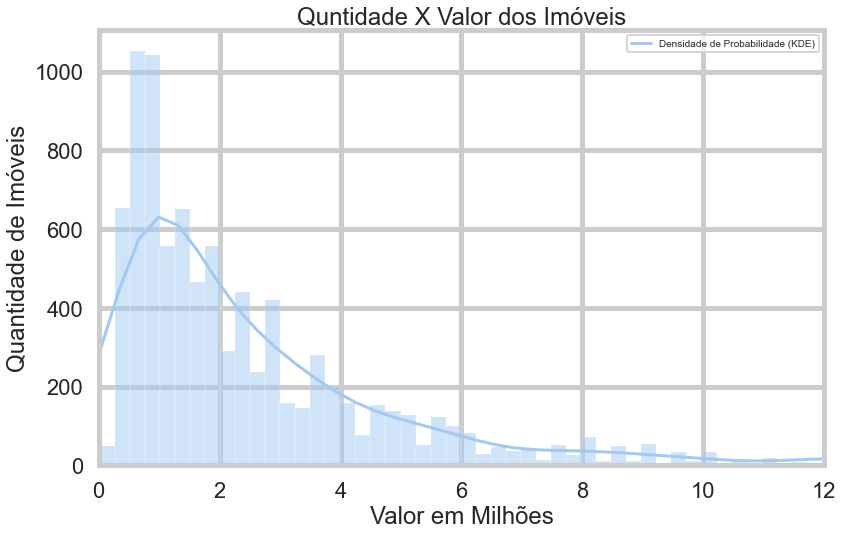

In [93]:
sns.set_context("poster", font_scale=1, rc={"grid.linewidth": 5, "axes.linewidth": 5, })
plt.figure(figsize=(13, 8))
ax = sns.histplot(data=dados_vendas, x="Valor_milhoes", kde=True)
ax.set_title("Quntidade X Valor dos Imóveis")
ax.set_xlabel("Valor em Milhões")
ax.set_ylabel("Quantidade de Imóveis")
ax.legend(['Densidade de Probabilidade (KDE)'], prop={'size': 10})
plt.xlim((0, 12))

# Desafio 3

3-Preço do metro quadrado por bairro e plotar em um gráfico ideal.

In [94]:
dados_vendas.head(1)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio,Valor_anuncio_float,Valor_milhoes
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None,7000000.000000,7.000000


In [95]:
dados_vendas['Preco_m_q'] = dados_vendas['Valor_anuncio_float']/dados_vendas['Metragem']

C:\Users\GRAZIE~1\AppData\Local\Temp/ipykernel_3660/3602230070.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_vendas['Preco_m_q'] = dados_vendas['Valor_anuncio_float']/dados_vendas['Metragem']


In [96]:
m_q_por_bairro = dados_vendas.groupby('Bairro')['Preco_m_q'].mean().reset_index()
m_q_por_bairro.head(10)

,Bairro,Preco_m_q
0,Aclimação,7656.169465
1,Alto da Boa Vista,5849.569011
2,Alto da Lapa,7606.728080
3,Alto da Mooca,5691.740133
4,Alto de Pinheiros,11269.979971
5,Aricanduva,1726.618705
6,Balneário Mar Paulista,3600.000000
7,Barra Funda,6173.434218
8,Barro Branco (Zona Norte),6146.308706
9,Bela Aliança,7233.548559


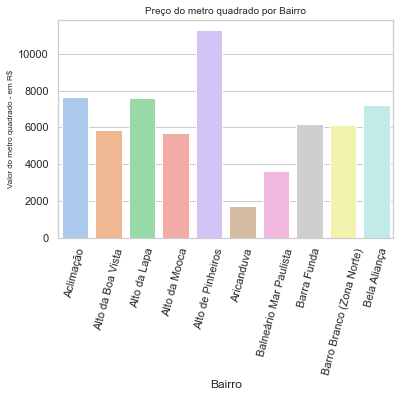

In [100]:
ax = sns.barplot(data=m_q_por_bairro.head(10), x='Bairro', y='Preco_m_q')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 75)
plt.title('Preço do metro quadrado por Bairro', fontsize=10)
plt.ylabel('Valor do metro quadrado - em R$', fontsize=8)
sns.set_theme(style="whitegrid", palette="pastel")

# Desafio 4

4-Explorar as bibliotecas de visualizações e colocar as suas conclusão

<AxesSubplot:title={'center':'Altura'}, xlabel='Metros', ylabel='Bairro'>

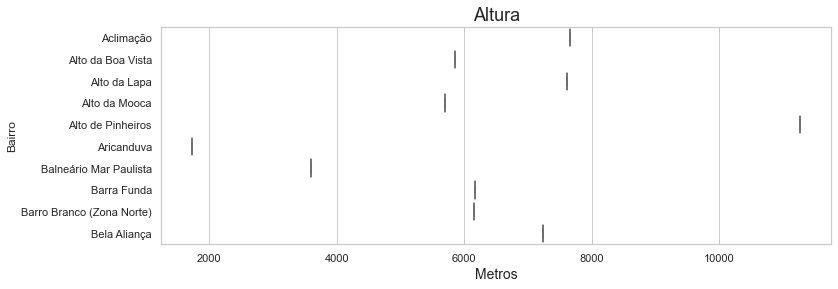

In [102]:
ax = sns.boxplot (x = 'Preco_m_q', y = 'Bairro', data = m_q_por_bairro.head(10), orient = 'h')
ax.figure.set_size_inches(12, 4)
ax.set_title('Altura', fontsize=18)
ax.set_xlabel('Metros', fontsize=14)
ax

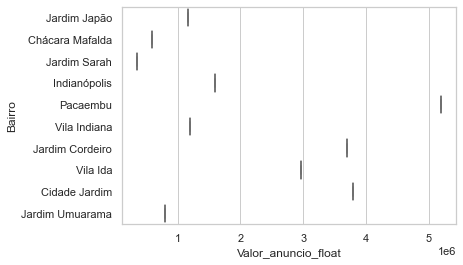

In [106]:
ax = sns.boxplot( x = 'Valor_anuncio_float', y = 'Bairro', data = dados_vendas.sample(10).query('Valor_anuncio_float <7000000'), orient = 'h')

# Desafio 5

5-Pesquisar um visualização para analisar os quartis, mediana e outliers.

In [115]:
#acho que aqui eu deveria ter retirado o 13 mil, seria isso?
dados_vendas.describe()

,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio_float,Valor_milhoes,Preco_m_q
count,9156.000000,9156.000000,9156.000000,9156.000000,9156.000000,9156.000000,9156.000000
mean,434.416230,3.446811,3.797073,3.960135,3052202.955439,3.052203,8004.066562
std,7856.422978,1.048944,1.967873,2.601022,3944208.186317,3.944208,5291.317781
min,10.000000,1.000000,1.000000,1.000000,13000.000000,0.013000,9.333333
25%,168.000000,3.000000,2.000000,2.000000,890000.000000,0.890000,4750.000000
50%,276.000000,3.000000,4.000000,4.000000,1800000.000000,1.800000,6500.000000
75%,450.000000,4.000000,5.000000,5.000000,3500000.000000,3.500000,9453.781513
max,750000.000000,16.000000,40.000000,50.000000,65000000.000000,65.000000,80000.000000


In [116]:
#abaixo fiz um gráfico para visualizar a variavel Vagas

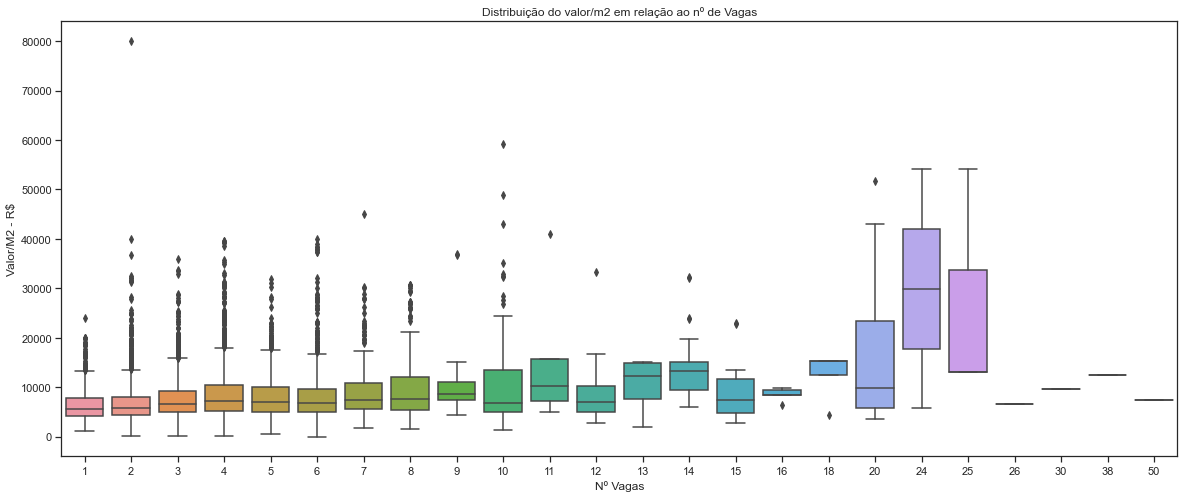

In [112]:
plt.figure(figsize=(20, 8))
sns.set_theme(style="ticks")
ax4 = sns.boxplot( y='Preco_m_q', x= 'Vagas', data= dados_vendas)
ax4.set_xlabel("Nº Vagas", fontsize ="12")
ax4.set_ylabel("Valor/M2 - R$")
ax4.set_title("Distribuição do valor/m2 em relação ao nº de Vagas", fontsize='12')
plt.show()